# Домашнее задание 3

In [192]:
import networkx as nx
import nltk
from nltk.util import ngrams
from nltk import word_tokenize
import matplotlib.pyplot as plt
import numpy
from collections import Counter
%matplotlib inline

In [193]:
G = nx.davis_southern_women_graph()

Посмотрим на узлы графа и нарисуем граф: узлы, соответствующие клубам, будут синими ("dodgerblue"), а узлы, соответствующие женщинам, – красным ("crimson").

In [194]:
print(G.nodes())

['Flora Price', 'Nora Fayette', 'E10', 'Verne Sanderson', 'E12', 'E14', 'Frances Anderson', 'Dorothy Murchison', 'Evelyn Jefferson', 'Ruth DeSand', 'Helen Lloyd', 'Olivia Carleton', 'Eleanor Nye', 'E11', 'E9', 'E8', 'E5', 'E4', 'E7', 'E6', 'E1', 'Myra Liddel', 'E3', 'E2', 'Theresa Anderson', 'Pearl Oglethorpe', 'Katherina Rogers', 'Brenda Rogers', 'E13', 'Charlotte McDowd', 'Sylvia Avondale', 'Laura Mandeville']


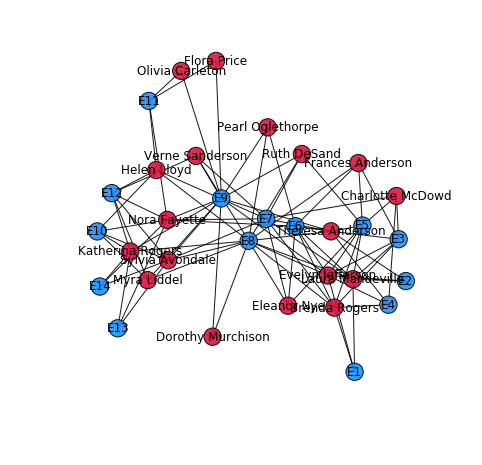

In [195]:
def palette(nodes):
    a = []
    for n in nodes:
        if len(n) <= 3:
            a.append('dodgerblue')
        else:
            a.append('crimson')
    return a
plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, node_color=palette(G.nodes()), alpha=0.9)

Чтобы посчитать коэффициент ассортативности, нам нужно, чтобы у узлов была дополнительная информация, некоторый аттрибут. Создадим такой граф на основе G, чтобы у каждого узла была информация, к какой группе принадлежит – к женщинам или клубам.

In [196]:
women = [node for node in G.nodes() if not len(node) <= 3]
clubs = [node for node in G.nodes() if node not in women]
print(women)
print(clubs)

H = nx.Graph()
H.add_nodes_from(women, type_="women")
H.add_nodes_from(clubs, type_="club")
H.add_edges_from(G.edges())

print(nx.attribute_assortativity_coefficient(H, attribute='type_'))

['Flora Price', 'Nora Fayette', 'Verne Sanderson', 'Frances Anderson', 'Dorothy Murchison', 'Evelyn Jefferson', 'Ruth DeSand', 'Helen Lloyd', 'Olivia Carleton', 'Eleanor Nye', 'Myra Liddel', 'Theresa Anderson', 'Pearl Oglethorpe', 'Katherina Rogers', 'Brenda Rogers', 'Charlotte McDowd', 'Sylvia Avondale', 'Laura Mandeville']
['E10', 'E12', 'E14', 'E11', 'E9', 'E8', 'E5', 'E4', 'E7', 'E6', 'E1', 'E3', 'E2', 'E13']
-1.0


Коэффициент ассортативности равен своей нижней границе: -1. 

Теперь нарисуем распределение степеней узлов в графе.

In [197]:
degree_sequence=sorted(nx.degree(H).values(),reverse=True) 
print(degree_sequence)
d = Counter(degree_sequence)
print(d)

[14, 12, 10, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2]
Counter({4: 8, 3: 5, 8: 5, 2: 3, 6: 3, 7: 3, 5: 2, 10: 1, 12: 1, 14: 1})


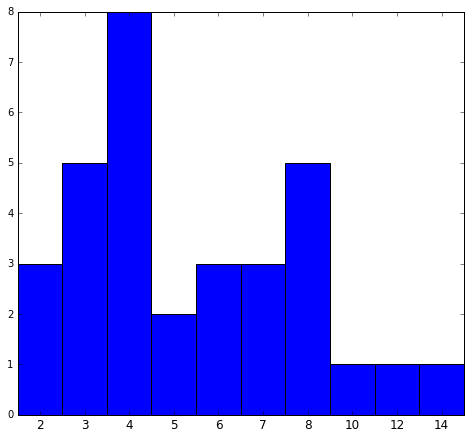

In [198]:
plt.figure(figsize=(8,8))
plt.bar(numpy.arange(len(d)),d.values(),width=1)
plt.xticks(numpy.arange(len(d))+0.5,tuple(d.keys()),rotation='horizontal',fontsize=12)
plt.subplots_adjust(bottom=0.2)
plt.show()

Теперь нарисуем зависимость средней степени соседей узла от степени узла.

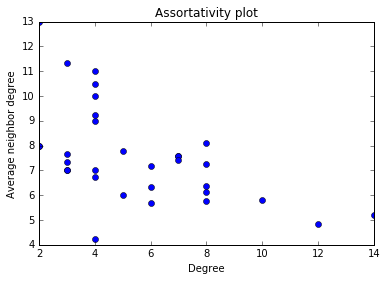

In [199]:
def mean_degree(graph, nodes):
    return(numpy.mean([G.degree(node) for node in nodes]))

nodes_degrees = [G.degree(node) for node in G.nodes()]
average_degrees = [mean_degree(G, list(G.neighbors(n))) for n in G.nodes()]

plt.plot(nodes_degrees, average_degrees, 'bo')
plt.xlabel('Degree')
plt.ylabel('Average neighbor degree')
plt.title('Assortativity plot')
plt.show()

Коэффициент ассортативности равен -1, что означает, что корреляция между степенью узла и степенью соседних узлов строго отрицательная. Значит, можно утверждать, что в данном графе узлы с высокой степенью чаще соединяются с узлами с низкой степенью. 
Это объясняется тем, что в графе есть два типа вершин – клубы и дамы, при этом каждая женщина ходит в небольшое количество клубов, а каждый клуб связывает большое количество женщин.

Если бы мы не знали о разделении вершин на две группы, то мы все равно смогли бы на основе ассортативности выдвинуть гипотезу, что граф является двудольным. Проверим гипотезу.

In [216]:
from networkx.algorithms import bipartite as bp
bp.is_bipartite(H)

True

In [218]:
women, clubs = bp.sets(H)
print(women); print(clubs)

set(['Theresa Anderson', 'Helen Lloyd', 'Flora Price', 'Katherina Rogers', 'Nora Fayette', 'Sylvia Avondale', 'Verne Sanderson', 'Olivia Carleton', 'Eleanor Nye', 'Brenda Rogers', 'Frances Anderson', 'Dorothy Murchison', 'Ruth DeSand', 'Laura Mandeville', 'Evelyn Jefferson', 'Charlotte McDowd', 'Myra Liddel', 'Pearl Oglethorpe'])
set(['E11', 'E10', 'E13', 'E12', 'E14', 'E9', 'E8', 'E5', 'E4', 'E7', 'E6', 'E1', 'E3', 'E2'])


Найдём матрицу смежности.

In [202]:
A = nx.adjacency_matrix(H)
print(A.todense())

[[0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 1 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


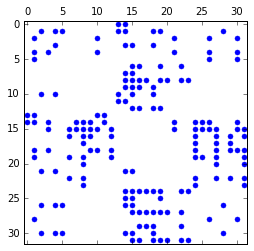

In [203]:
plt.spy(A, precision=0, marker='.', markersize=10)
plt.show()

In [214]:
B = bp.biadjacency_matrix(H,clubs,women)
print(B)

  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (0, 7)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 16)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (3, 1)	1
  (3, 3)	1
  (3, 4)	1
  (3, 5)	1
  (3, 6)	1
  (3, 16)	1
  (4, 3)	1
  (4, 4)	1
  (4, 5)	1
  (5, 0)	1
  (5, 2)	1
  (5, 3)	1
  (5, 4)	1
  :	:
  (9, 8)	1
  (9, 9)	1
  (9, 12)	1
  (9, 13)	1
  (9, 15)	1
  (10, 0)	1
  (10, 4)	1
  (10, 8)	1
  (10, 9)	1
  (10, 10)	1
  (10, 13)	1
  (10, 14)	1
  (10, 17)	1
  (11, 9)	1
  (11, 13)	1
  (11, 14)	1
  (12, 0)	1
  (12, 9)	1
  (12, 10)	1
  (12, 13)	1
  (12, 14)	1
  (12, 15)	1
  (13, 0)	1
  (13, 13)	1
  (13, 14)	1


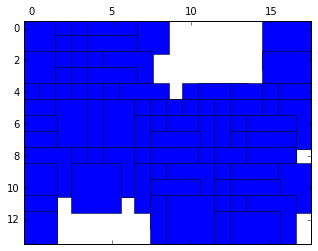

In [221]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spy(B, precision=0, marker='s', markersize=50)
plt.show()

Несмотря на то, что матрица получилась странной, она является блочной, а граф – двудольным. То есть данный граф можно поделить на две группы так, внутри групп не было связей, а между группами – была. Это логично: в изначальном графе клубы не соединялись с клубами, а узлы, соответствующие женщинам, – с узлами, соответствующими женщинам.

Теперь нарисуем проекции графа.

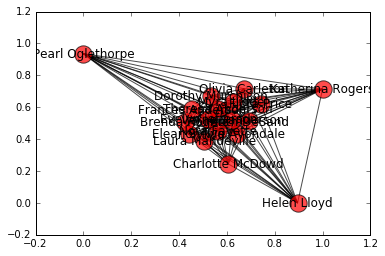

In [224]:
GBA = bp.projected_graph(H, women) 
nx.draw_networkx(GBA,node_color='red',alpha=0.7)

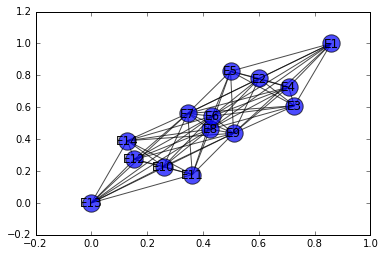

In [225]:
GBD = bp.projected_graph(H, clubs) 
nx.draw_networkx(GBD,node_color='blue',alpha=0.7)